## Introduction

The purpose of this kernel is to perform data analytics and visualization of the data from the soccer database: https://www.kaggle.com/hugomathien/soccer. Once completed, a second kernel will be completed in an attempt to predict the winner of soccer games based off the league, teams and results availabe in the data. 

# Table of Contents
* [Import and load data](#import)
* [Data Analysis and Visualization](#data-analysis-and-viz) 
    * [Analyzing Country Table](#country)
    * [Analyzing League Table](#league)
    * [Analyzing Player Table](#analyze-player-table)
    * [Analyzing Player Attributes Table](#analyze-player-att-table)
    * [Analyzing Team Table](#analyze-team-table)
    * [Analyzing Team Attributes Table](#analyze-team-att-table)
    * [Conclusion](#conclusion)

## <a id='import'></a> Import and load data

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


# Any results you write to the current directory are saved as output.

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [7]:
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
con = sqlite3.connect('../input/database.sqlite')
cursor = con.cursor()
table_names = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


Read all sql tables into data frames to be analyzed. 

In [9]:
player_table = pd.read_sql_query("SELECT * FROM Player", con)
player_att_table = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
match_table = pd.read_sql_query("SELECT * FROM Match", con)
league_table = pd.read_sql_query("SELECT * FROM League", con)
country_table = pd.read_sql_query("SELECT * FROM Country", con)
team_table = pd.read_sql_query("SELECT * FROM Team", con)
team_att_table = pd.read_sql_query("SELECT * FROM Team_Attributes", con)

## <a id='data-analysis-and-viz'></a> Data Analysis and Visualization 

### <a id='country'></a> Analyzing Country Table

In [10]:
print("Dimension of Country Table is: {}".format(country_table.shape))
print(100*"*")
print(country_table.info())
print(100*"*")
print(country_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(country_table.describe())
print(100*"*")
print(country_table.isnull().sum(axis=0))

Dimension of Country Table is: (11, 2)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
****************************************************************************************************
               name
count            11
unique           11
top     Netherlands
freq              1
****************************************************************************************************
                 id
count     11.000000
mean   12452.090909
std     8215.308472
min        1.000000
25%     6289.000000
50%    13274.000000
75%    18668.000000
max    24558.000000
****************************************************************************************************
id      0
name    0
dtype: int64


In [11]:
country_table

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


### <a id='league'></a> Analyzing League Table

In [12]:
print("Dimension of League Table is: {}".format(league_table.shape))
print(100*"*")
print(league_table.info())
print(100*"*")
print(league_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(league_table.describe())
print(100*"*")
print(league_table.isnull().sum(axis=0))

Dimension of League Table is: (11, 3)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes
None
****************************************************************************************************
                          name
count                       11
unique                      11
top     Netherlands Eredivisie
freq                         1
****************************************************************************************************
                 id    country_id
count     11.000000     11.000000
mean   12452.090909  12452.090909
std     8215.308472   8215.308472
min        1.000000      1.000000
25%     6289.000000   6289.000000
50%    13274.000000  13274.000000
75%    

In [13]:
league_table

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


Data is available only for the european leagues. Note that top 5 leaguesa are: Ligue 1, Bundesliga, Serie A, Premier League and LIGA BBVA

### <a id='analyze-player-table'></a>Analyzing Player Table

In [14]:
print("Dimension of Player Table is: {}".format(player_table.shape))
print(100*"*")
print(player_table.info())
print(100*"*")
print(player_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(player_table.describe())
print(100*"*")
print(player_table.isnull().sum(axis=0))
#Player table has no missing data

Dimension of Player Table is: (11060, 7)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB
None
****************************************************************************************************
       player_name             birthday
count        11060                11060
unique       10848                 5762
top         Danilo  1989-03-02 00:00:00
freq             7                   10
***************************************************************************

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


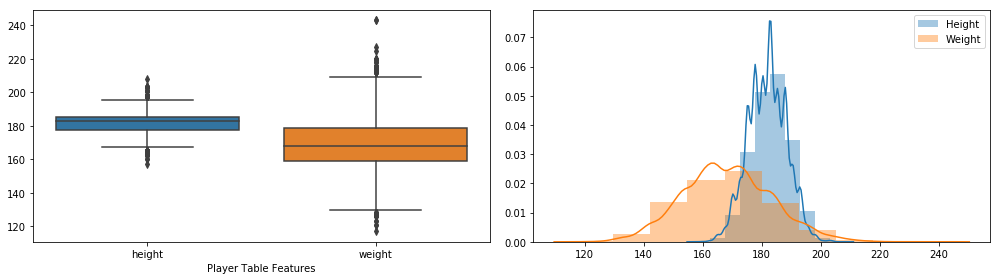

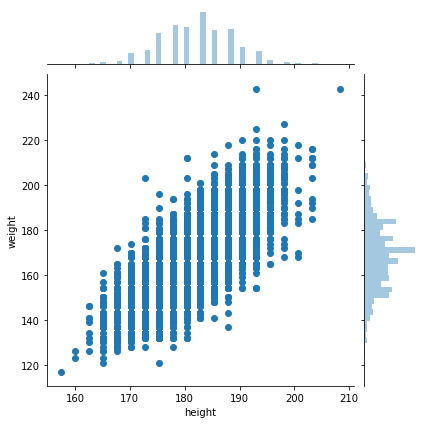

In [15]:
fig1, ax1 = plt.subplots(nrows = 1, ncols = 2)
fig1.set_size_inches(14,4)
sns.boxplot(data = player_table.loc[:,["height",'weight']], ax = ax1[0])
ax1[0].set_xlabel('Player Table Features')
ax1[0].set_ylabel('')
sns.distplot(a = player_table.loc[:,["height"]], bins= 10, kde = True, ax = ax1[1], \
            label = 'Height')
sns.distplot(a = player_table.loc[:,["weight"]], bins= 10, kde = True, ax = ax1[1], \
            label = 'Weight')
ax1[1].legend()
sns.jointplot(x='height',y = 'weight',data = player_table,kind = 'scatter')
fig1.tight_layout()

In [16]:
print("Cardinality of Feature: Height - {:0.3f}%".format( \
        100 * (len(np.unique(player_table.loc[:,'height'])) / len(player_table.loc[:,'height']))))
print("Cardinality of Feature: Weight - {:0.3f}%".format( \
        100 * (len(np.unique(player_table.loc[:,'weight'])) / len(player_table.loc[:,'weight']))))

Cardinality of Feature: Height - 0.181%
Cardinality of Feature: Weight - 0.452%


Very low cardinality for continuous variable for both the weight and height features considering we have 11060 instances. As expected instances from both the weight and height features follow a normal distribution and follow a linear relationship. 

### <a id='analyze-player-att-table'></a> Analyzing Player Attributes Table

In [17]:
print("Dimension of Player Attributes Table is: {}".format(player_att_table.shape))
print(100*"*")
print(player_att_table.info())
print(100*"*")
print(player_att_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(player_att_table.describe())
print(100*"*")
print(player_att_table.isnull().sum(axis=0))
#Player Attributes Table has some missing data

Dimension of Player Attributes Table is: (183978, 42)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null 

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [18]:
np.unique(player_att_table.dtypes.values)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [19]:
player_att_table.select_dtypes(include =['float64','int64']).head().\
loc[:,player_att_table.select_dtypes(include =['float64','int64']).columns[3:]].head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Analyze the correlation between the continuous features. We should see a positive correlation between the attacking features, a positive correlation between the defensive features and a negative correlation between the attacking and defensive features.  

In [20]:
corr2 = player_att_table.select_dtypes(include =['float64','int64']).\
loc[:,player_att_table.select_dtypes(include =['float64','int64']).columns[3:]].corr()

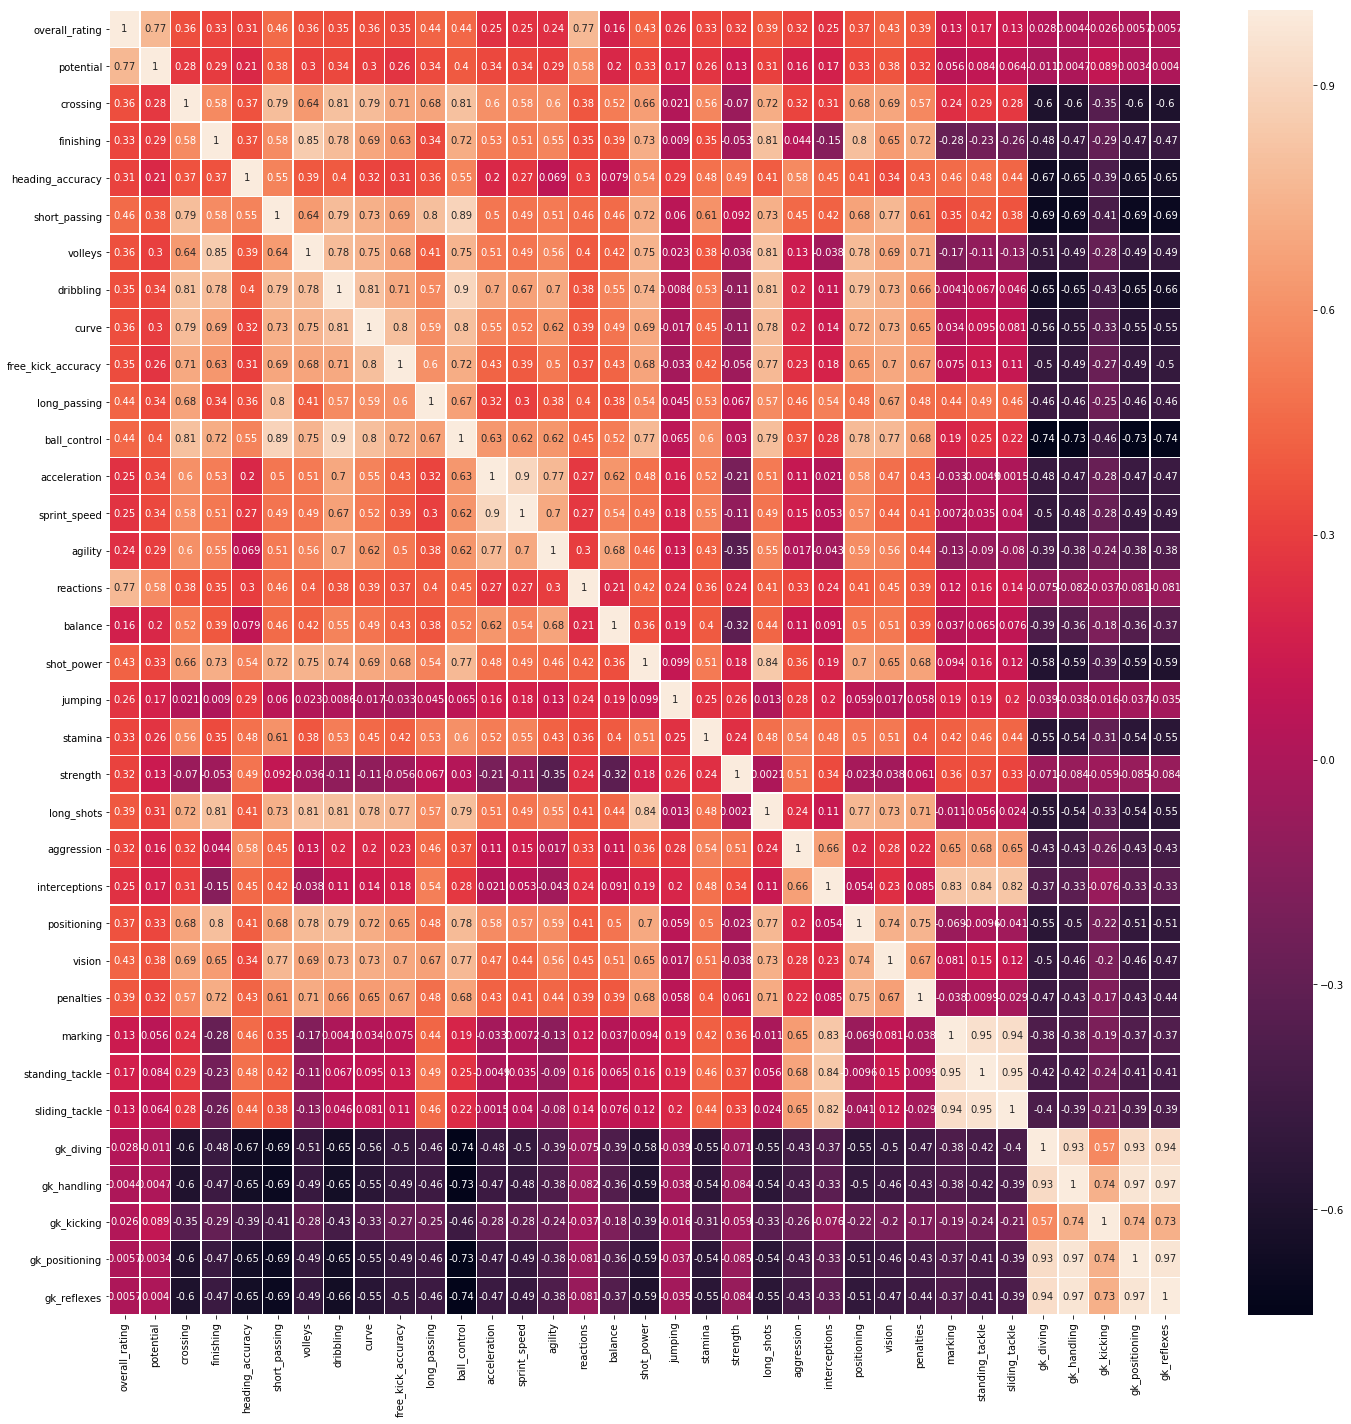

In [21]:
fig2,ax2 = plt.subplots(nrows = 1,ncols = 1)
fig2.set_size_inches(w=24,h=24)
sns.heatmap(corr2,annot = True,linewidths=0.5,ax = ax2)

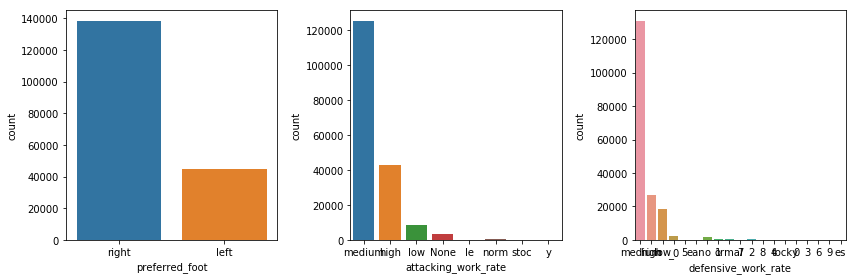

In [22]:
fig3, ax3 = plt.subplots(nrows = 1, ncols = 3)
fig3.set_size_inches(12,4)
sns.countplot(x = player_att_table['preferred_foot'],ax = ax3[0])
sns.countplot(x = player_att_table['attacking_work_rate'],ax = ax3[1])
sns.countplot(x = player_att_table['defensive_work_rate'],ax = ax3[2])
fig3.tight_layout()

Figure out which columns have strange attacking and defensive work rate. Is there a correlation between attacking and defensive work rate values? If one is strange, is the other strange? 

In [23]:
print(player_att_table['attacking_work_rate'].value_counts())
print(100*'*')
print(player_att_table['defensive_work_rate'].value_counts())
print(100*'*')
print(player_att_table.shape)

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64
****************************************************************************************************
medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
6            197
0            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64
****************************************************************************************************
(183978, 42)


The levels for both the attacking work rate and defensive work rate cateorical features should be 'low', 'medium', and 'high'. Note that they also account for the majority of instances. The remaining of the levels do not make sense so remove the instances that contain them. 

In [24]:
player_att_table.loc[~(player_att_table['attacking_work_rate'].\
                                                  isin(['medium','high','low'])\
                       | player_att_table['defensive_work_rate'].isin(['medium','high','low'])),:].head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
373,374,156626,46447,2010-08-30 00:00:00,64.0,71.0,right,None,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,58.0,73.0,48.0,75.0,64.0,71.0,39.0,71.0,58.0,28.0,61.0,39.0,62.0,61.0,57.0,15.0,14.0,13.0,10.0,12.0
374,375,156626,46447,2010-02-22 00:00:00,64.0,71.0,right,None,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,58.0,73.0,48.0,75.0,64.0,71.0,39.0,71.0,62.0,66.0,61.0,58.0,62.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
375,376,156626,46447,2008-08-30 00:00:00,66.0,71.0,right,None,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,58.0,73.0,48.0,75.0,64.0,74.0,39.0,71.0,62.0,66.0,61.0,58.0,67.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
376,377,156626,46447,2007-08-30 00:00:00,68.0,75.0,right,None,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,62.0,73.0,48.0,75.0,72.0,74.0,39.0,76.0,66.0,69.0,61.0,58.0,69.0,64.0,57.0,6.0,20.0,45.0,20.0,20.0
377,378,156626,46447,2007-02-22 00:00:00,66.0,65.0,right,None,_0,41.0,33.0,70.0,51.0,24.0,30.0,35.0,55.0,45.0,44.0,60.0,61.0,59.0,62.0,73.0,48.0,75.0,72.0,74.0,39.0,76.0,66.0,69.0,61.0,55.0,66.0,63.0,57.0,6.0,9.0,45.0,13.0,10.0


In [25]:
player_att_table_updated1 = player_att_table.loc[(player_att_table['attacking_work_rate'].\
                                                  isin(['medium','high','low'])\
                       & player_att_table['defensive_work_rate'].isin(['medium','high','low'])),:]
print(player_att_table_updated1.shape)
player_att_table_updated1.head()

(176161, 42)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


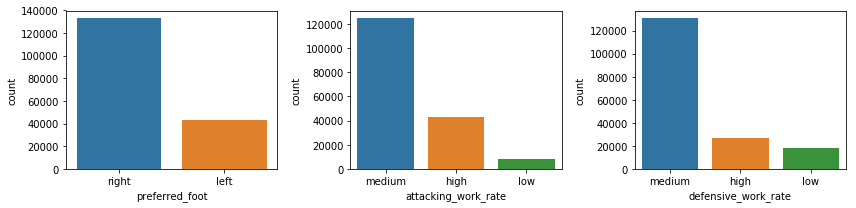

In [26]:
fig4, ax4 = plt.subplots(nrows = 1, ncols = 3)
fig4.set_size_inches(12,3)
sns.countplot(x = player_att_table_updated1['preferred_foot'],ax = ax4[0])
sns.countplot(x = player_att_table_updated1['attacking_work_rate'],ax = ax4[1])
sns.countplot(x = player_att_table_updated1['defensive_work_rate'],ax = ax4[2])
fig4.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


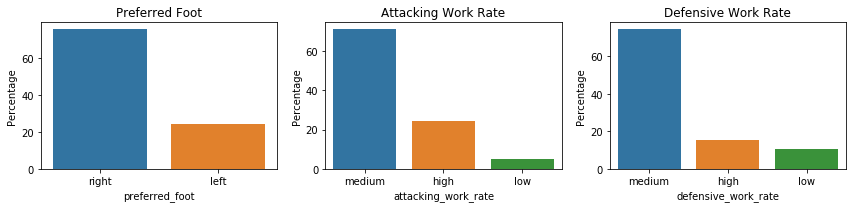

In [27]:
fig4, ax4 = plt.subplots(nrows = 1, ncols = 3)
fig4.set_size_inches(12,3)
sns.barplot(x ='preferred_foot', y = 'preferred_foot', data = player_att_table_updated1,\
            estimator = lambda x: len(x)/len(player_att_table_updated1) * 100, ax = ax4[0],\
           orient = 'v')
ax4[0].set(ylabel = 'Percentage',title = 'Preferred Foot')
sns.barplot(x ='attacking_work_rate', y = 'attacking_work_rate', data = player_att_table_updated1,\
            estimator = lambda x: len(x)/len(player_att_table_updated1) * 100, ax = ax4[1],\
           orient = 'v')
ax4[1].set(ylabel = 'Percentage',title = 'Attacking Work Rate')
sns.barplot(x ='defensive_work_rate', y = 'defensive_work_rate', data = player_att_table_updated1,\
            estimator = lambda x: len(x)/len(player_att_table_updated1) * 100, ax = ax4[2],\
           orient = 'v')
ax4[2].set(ylabel = 'Percentage',title = 'Defensive Work Rate')
fig4.tight_layout()

In [28]:
att_work_rate = player_att_table_updated1.groupby('attacking_work_rate').size().values.tolist()
def_work_rate = player_att_table_updated1.groupby('defensive_work_rate').size().values.tolist()

In [29]:
print("Attacking work rate factor, Medium, accounts for: {:0.3f}% of features".format(100 * att_work_rate[2]/np.sum(att_work_rate)))
print("Defensive work rate factor, Medium, accounts for: {:0.3f}% of features".format(100 * def_work_rate[2]/np.sum(def_work_rate)))

Attacking work rate factor, Medium, accounts for: 70.885% of features
Defensive work rate factor, Medium, accounts for: 74.230% of features


Percentage of rows eliminated due to invalid/strange attacking and defensive work rate values:

In [30]:
print("Percentage of instances removed from player attributes table: {:0.2f}%".\
      format(100* (1 - player_att_table_updated1.shape[0]/player_att_table.shape[0])))
print("We removed {} instances from Player Attributes table".\
      format(-player_att_table_updated1.shape[0] + player_att_table.shape[0]))

Percentage of instances removed from player attributes table: 4.25%
We removed 7817 instances from Player Attributes table


In [31]:
print("Dimension of Player Attributes Table Updated 1 is: {}".format(player_att_table_updated1.shape))
print(100*"*")
print(player_att_table_updated1.info())
print(100*"*")
print(player_att_table_updated1.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(player_att_table_updated1.describe())
print(100*"*")
print(player_att_table_updated1.isnull().sum(axis=0))
#No more missing data

Dimension of Player Attributes Table Updated 1 is: (176161, 42)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 176161 entries, 0 to 183977
Data columns (total 42 columns):
id                     176161 non-null int64
player_fifa_api_id     176161 non-null int64
player_api_id          176161 non-null int64
date                   176161 non-null object
overall_rating         176161 non-null float64
potential              176161 non-null float64
preferred_foot         176161 non-null object
attacking_work_rate    176161 non-null object
defensive_work_rate    176161 non-null object
crossing               176161 non-null float64
finishing              176161 non-null float64
heading_accuracy       176161 non-null float64
short_passing          176161 non-null float64
volleys                176161 non-null float64
dribbling              176161 non-null float64
curve                  176161

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


Use all features in Player Attributes Updated table? Use Principal Component Analysis to reduce number of features in this table? Use only overall rating since this number is an accumulation of all other features for each player? Do not use any features? Will look into it in second kernel for prediction. 

Analyze distribution and spead of continuous features based off of categorical features. Do the levels of each categorical features drastically change the distribution / spead of the continuous features?

In [32]:
pat = player_att_table_updated1.loc[:,player_att_table_updated1.columns.tolist()[3:]]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


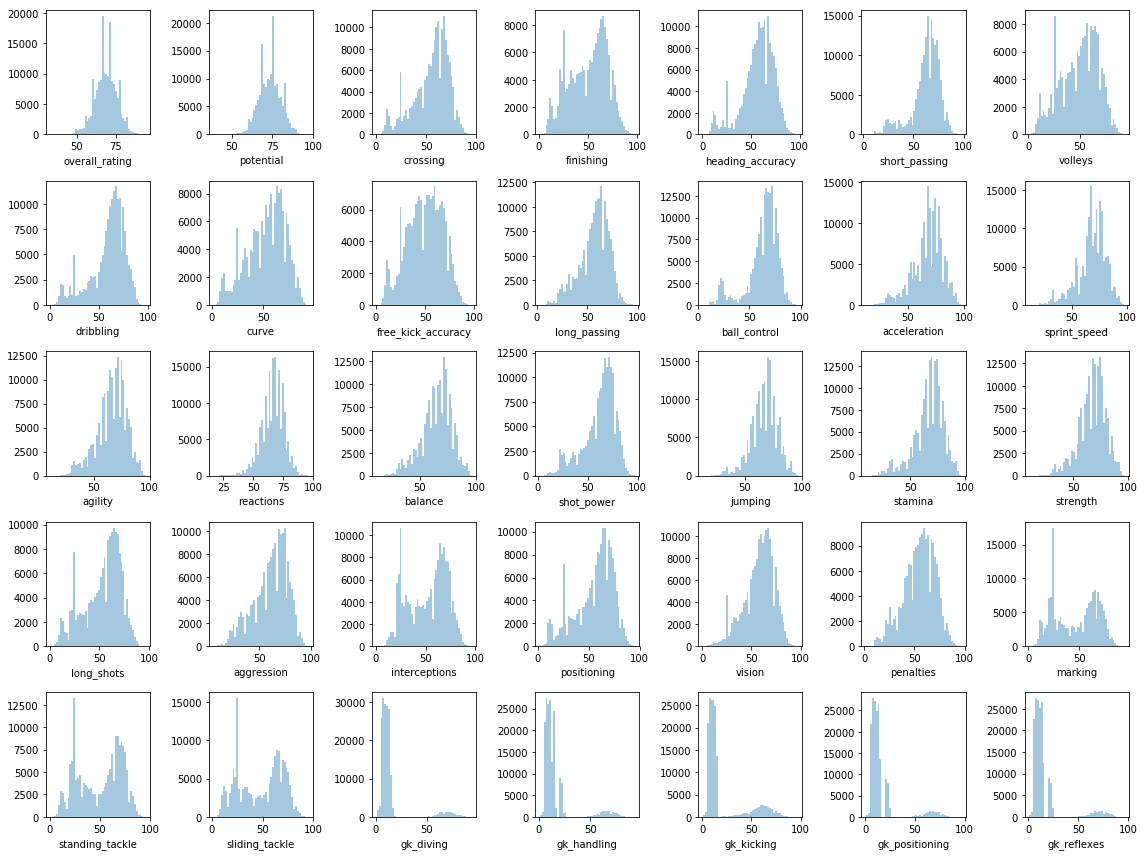

In [33]:
fig5, ax5 = plt.subplots(nrows=5,ncols=7)
fig5.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.distplot(pat.loc[:,j],kde = False,hist = True, ax = ax5[int(i/7)][i%7])
fig5.tight_layout()

In [ ]:
fig6, ax6 = plt.subplots(nrows=5,ncols=7)
fig6.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.boxplot(x = "preferred_foot", y = j, data= pat, ax = ax6[int(i/7)][i%7])
fig6.tight_layout()

Preferred Foot does not distinguish any of the variables. Distribution of features the same regardless of preferred foot

In [ ]:
fig7, ax7 = plt.subplots(nrows=5,ncols=7)
fig7.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.boxplot(x = "attacking_work_rate", y = j, data= pat, ax = ax7[int(i/7)][i%7])
fig7.tight_layout() 

Attacking work rate does a better job (better than preferred foot) of separating the features but not in a significant manner. Note that it does do a decent job of separating instances with high and low attacking work rate. Also remember that for attacking work rate feature, the factor, Medium', accounts for 70% of the instances. From closer examination, it appears that for features related to atacking attributes, attacking work rate feature does a good job of distinguishing instances of high and low categorical values. 

In [ ]:
fig8, ax8 = plt.subplots(nrows=5,ncols=7)
fig8.set_size_inches(16,12)
for i,j in enumerate(player_att_table_updated1.select_dtypes(include = ['float64','int64']).columns[3:].tolist()):
    sns.boxplot(x = "defensive_work_rate", y = j, data= pat, ax = ax8[int(i/7)][i%7])
fig8.tight_layout()

Similar to attacking work rate, defensive work rate does a better job (better than preferred foot) of separating the features but not in a significant manner. Note that it does do a decent job of separating instances with high and low defensive work rate values for certain features. Also remember that for attacking work rate feature, the factor, Medium', accounts for 70% of the instances. From closer examination, it appears that for features related to defensive attributes, defensive work rate feature does a good job of distinguishing instances of high and low categorical values. 

>### <a id='analyze-team-table'></a> Analyzing Team Table 

In [ ]:
print("Dimension of Team Table is: {}".format(team_table.shape))
print(100*"*")
print(team_table.info())
print(100*"*")
print(team_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(team_table.describe())
print(100*"*")
print(team_table.isnull().sum(axis=0))

In [ ]:
team_table[team_table.loc[:,'team_fifa_api_id'].isnull()]

In [ ]:
team_table_updated = team_table[~team_table.loc[:,'team_fifa_api_id'].isnull()]

In [ ]:
print("Dimension of Team Table Updated is: {}".format(team_table_updated.shape))
print(100*"*")
print(team_table_updated.info())
print(100*"*")
print(team_table_updated.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(team_table_updated.describe())
print(100*"*")
print(team_table_updated.isnull().sum(axis=0))
print(100*"*")
print(team_table_updated.select_dtypes(exclude=['float64','int64']).apply(lambda x: len(x.unique().tolist()),axis = 0))

In [ ]:
print(len(team_table_updated['team_long_name'].unique().tolist()),\
      len(team_table_updated['team_short_name'].unique().tolist()))

In [ ]:
my_team = dict()
for i,j in list(team_table_updated.iloc[:,3:].groupby('team_short_name')):
    my_team[i] = j.iloc[:,0].values.tolist()

In [ ]:
{k:v for k,v in my_team.items() if len(v) > 1}
#List of teams with similar short team names

### <a id='analyze-team-att-table'></a> Analyzing Team Attributes Table

In [ ]:
print("Dimension of Team Attributes Table is: {}".format(team_att_table.shape))
print(100*"*")
print(team_att_table.info())
print(100*"*")
print(team_att_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(team_att_table.describe())
print(100*"*")
print(team_att_table.isnull().sum(axis=0))

Only attribute "buildUpPlayDribbling" has missing values.Look into it. See if other variables at NA instance are strange

In [ ]:
team_att_table.loc[team_att_table['buildUpPlayDribbling'].isnull(),:].head()

In [ ]:
team_att_table.loc[~team_att_table['buildUpPlayDribbling'].isnull(),:].head()

Does not seem to be related to the other featues and more than 50% of the features are missing. In order to not skew data, drop feaure from dataset and continue analyzing the rest

In [ ]:
team_att_table_updated1 = team_att_table.drop(['buildUpPlayDribbling'],axis = 1)
print("Dimension of Team Attributes Table updated is: {}".format(team_att_table_updated1.shape))
print(100*"*")
print(team_att_table_updated1.info())
print(100*"*")
print(team_att_table_updated1.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(team_att_table_updated1.describe())
print(100*"*")
print(team_att_table_updated1.isnull().sum(axis=0))

In [ ]:
tat = team_att_table_updated1.loc[:,team_att_table_updated1.columns.tolist()[3:]]

In [ ]:
sns.pairplot(tat)
#Little to no correlation beween any of the continuous features

In [ ]:
fig9, ax9 = plt.subplots(nrows=2,ncols=4)
fig9.set_size_inches(12,6)
for i,j in enumerate(team_att_table_updated1.select_dtypes(include = ['int64']).columns[3:].tolist()):
    sns.distplot(tat.loc[:,j],kde =True,hist = True, ax = ax9[int(i/4)][i%4])
fig9.tight_layout()

None of the continuous features are normaly distributted or appear to follow exponential family distributions. Multimodal maybe?

In [ ]:
 team_att_table_updated1.select_dtypes(include = ['int64']).head()

In [ ]:
sns.boxplot(data = team_att_table_updated1.select_dtypes(include = ['int64']).iloc[:,3:],\
           orient = 'h')

In [ ]:
fig9, ax9 = plt.subplots(nrows=3,ncols=4)
fig9.set_size_inches(14,8)
for i,j in enumerate(team_att_table_updated1.select_dtypes(include = ['object']).columns[1:].tolist()):
    #sns.countplot(tat.loc[:,j], ax = ax9[int(i/4)][i%4])
    sns.barplot(x = j, y = j, data = tat,\
            estimator = lambda x: len(x)/len(tat) * 100, ax = ax9[int(i/4)][i%4],\
           orient = 'v')
    ax9[int(i/4)][i%4].set(xlabel = "")
fig9.tight_layout()

In [ ]:
tat.select_dtypes(include = ['int64']).columns.tolist()

In [ ]:
sns.pairplot(tat,hue = tat.select_dtypes(include = ['object']).\
          columns.tolist()[1]) 

When build up play speed is plotted versus the remaining features, build up play speed class appears to perfectly distinguish the plot into sections. This makes sense because as build up play increases in value, the categorical feature of the observation changes from slow to balanced to fast. Most likely, the build up play speed variable was cut into three different and distinct regions, creating the build up play speed class. Either feature can be used (build up play speed or build up play speed class for prediction) but not both since they represent the same thing. Same principle applies for:
* Build up play speed
* Build up play passing
* Chance creation passing
* Chance creation crossing
* Chance creation shooting
* Defense pressure
* Defense aggression
* Defense team width

As for the remaining continuous features, the remaining categorical variables do a poor job of separating/clustering the data. See below for an example

In [ ]:
sns.pairplot(tat,hue = tat.select_dtypes(include = ['object']).\
          columns.tolist()[12]) 

In [ ]:
fig9, ax9 = plt.subplots(nrows=2,ncols=4)
fig9.set_size_inches(12,6)
for i,j in enumerate(team_att_table_updated1.select_dtypes(include = ['int64']).columns[3:].tolist()):
    sns.boxplot(data = tat, y = j, x = tat.select_dtypes(include = ['object']).columns[3],\
                                                      ax = ax9[int(i/4)][i%4])
fig9.tight_layout()

Boxplots, as displayed above, also confirm the fact that some continuous and categorical features are duplicates of each other since the categorical features do an amazing job of separating its respective continuous feature

### <a id='conclusion'></a> Conclusion

Analyzing the league, country, player, player attributes, team and team atributes tables gave a better understanding of the data. Once the respective features are joined and merged with the match table, machine learning algorithms can be used to predict the winner of the future soccer matches in the european league. This kernel also allows for the opportunity to practice using the seaborn library and visualizing the data.   